# DIGIT RECOGNIZATION ALGORITHM
## This is a MultiClass Classification problem which revolve around predicting the handwritten digits stored as 28 * 28 pixel images.

### Each image is stored as 28*28 pixel array and pixels vary between 0 to 255, 0 being black and 255 being white color pixel on grey-scale.
### We use two classification Algorithms, XGBoost Classifier and Neural Networks( Multilayer Perceptron) to predict the test data-set.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
train = pd.read_csv("digit_train.csv")
test = pd.read_csv("digit_test.csv")

In [23]:
train.shape

(23522, 785)

In [7]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23517,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23518,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23519,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23520,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
eg = train.head(5).copy()
eg.drop("label", axis = 1, inplace = True)
eg

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
eg = np.array(eg).reshape(5, 28, 28)
eg


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

## Visualizing the training examples

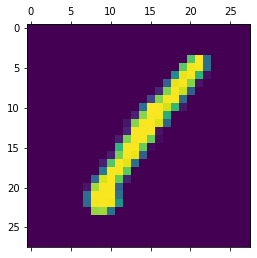

In [10]:
plt.matshow(eg[0])

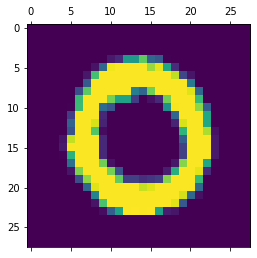

In [11]:
plt.matshow(eg[1])

In [12]:
from sklearn.model_selection import train_test_split as tts

In [13]:
X = train.copy()
X.drop("label", axis = 1, inplace = True)
X = X/255
Y = train["label"]
X_train, X_cv, Y_train, Y_cv = tts(X, Y, test_size = 0.2, random_state = 0)

## MODEL-1 (XGBoost CLASSIFIER)

In [14]:
# MODEL-1 (XGBoost CLASSIFIER)
import xgboost as xgb
model1 = xgb.XGBClassifier(num_classes = 10, random_state = 0)
model1.fit(X_train, Y_train)
pred1 = model1.predict(X_cv)

In [15]:
pred1


array([7, 4, 9, ..., 1, 9, 8])

In [16]:
Y_cv

21882    7
7100     4
439      9
10962    4
3515     5
        ..
3014     4
4816     0
4523     1
437      9
1657     8
Name: label, Length: 4705, dtype: int64

### Now we find F1 scores, precision and recall for our predicted cross validation set to see how well our model fits for new examples. 
### Also we build a Confusion Matrix which would help us understand what features can we work on increasing the accuracy.

In [17]:
from sklearn.metrics import classification_report as cr
print(cr(pred1, Y_cv))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       447
           1       0.98      0.96      0.97       548
           2       0.92      0.95      0.93       459
           3       0.91      0.92      0.91       479
           4       0.94      0.93      0.93       470
           5       0.91      0.94      0.92       403
           6       0.96      0.96      0.96       462
           7       0.92      0.94      0.93       477
           8       0.91      0.90      0.91       462
           9       0.91      0.87      0.89       498

    accuracy                           0.93      4705
   macro avg       0.93      0.93      0.93      4705
weighted avg       0.93      0.93      0.93      4705



Text(69.0, 0.5, 'Truth')

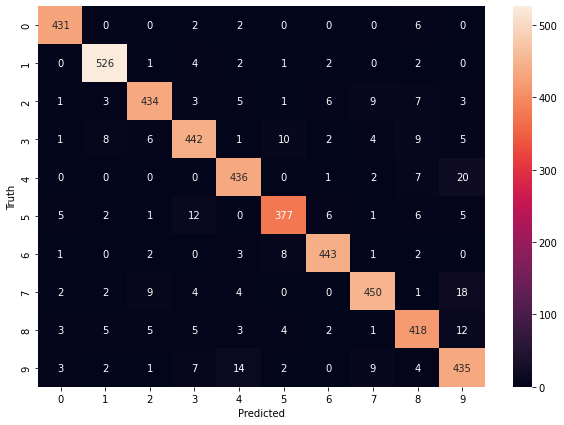

In [19]:
from sklearn.metrics import confusion_matrix as cm
c = cm(y_true=Y_cv,y_pred=pred1)

import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(c, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## MODEL-2 (NEURAL NETWORK)

### This is a basic implementation of neural networks. We will use only one hidden layer with 100 units and one bias unit. The libraries which we need to import are TensorFlow and Keras is already pre-installed in tensorflow.

In [31]:
# IMPLEMENTING THE NEURAL NETWORK ALGORITHM(MULTILAYER PERCEPTRON)
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([keras.layers.Dense(100, input_shape= (784,), activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')
                          ])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, Y_train, epochs = 5)

Epoch 1/5
589/589 [==============================] - 4s 5ms/step - loss: 0.4345 - accuracy: 0.8762
Epoch 2/5
589/589 [==============================] - 3s 6ms/step - loss: 0.2109 - accuracy: 0.9396
Epoch 3/5
589/589 [==============================] - 3s 4ms/step - loss: 0.1514 - accuracy: 0.9556
Epoch 4/5
589/589 [==============================] - 2s 3ms/step - loss: 0.1141 - accuracy: 0.9675
Epoch 5/5
589/589 [==============================] - 2s 3ms/step - loss: 0.0911 - accuracy: 0.9746


In [32]:
model.evaluate(X_cv, Y_cv)

148/148 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.9628


[nan, 0.9628055095672607]

In [29]:
X_train.shape

(18817, 784)

### Visualizing the accuracy on cv dataset

Text(69.0, 0.5, 'Truth')

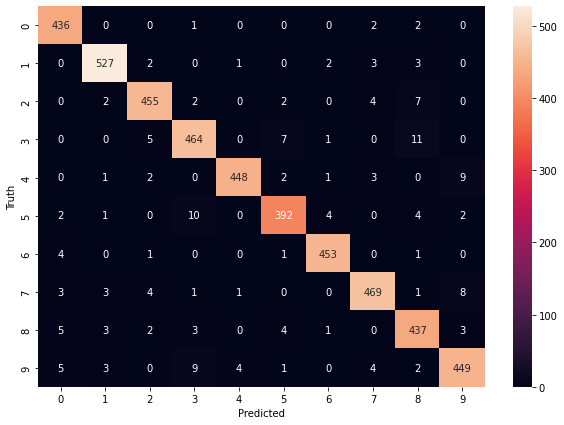

In [33]:
pred_cv = model.predict(X_cv)
Y_pred_cv = [np.argmax(i) for i in pred_cv]
cm = tf.math.confusion_matrix(labels=Y_cv,predictions=Y_pred_cv)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Here by taking a quick look at the Confusion Matrix heatmap, we can tell that our model find it hard to distuinguish between 3 and 8 or may be 0 and 9 or 0 and 8, etc. 
### So we can manually look at these examples and either change the resolution or quality of the image or some other feature engineering also. Confusion Matrix is usually a good way to visualise the prediction results majorly i classification problems.


In [36]:
print(cr(Y_pred_cv, Y_cv))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       455
           1       0.98      0.98      0.98       540
           2       0.96      0.97      0.97       471
           3       0.95      0.95      0.95       490
           4       0.96      0.99      0.97       454
           5       0.94      0.96      0.95       409
           6       0.98      0.98      0.98       462
           7       0.96      0.97      0.96       485
           8       0.95      0.93      0.94       468
           9       0.94      0.95      0.95       471

    accuracy                           0.96      4705
   macro avg       0.96      0.96      0.96      4705
weighted avg       0.96      0.96      0.96      4705



### We can see that our overall F1- Score is 0.96 which is what a descent neural network should have given. We can increase our hidden layers or no. of units in a hidden layer. Also we can change our activation function to sigmoid. 
### However it is Computationally Expensive and it is advised to use Google Colab for running the Algorithm.